In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
# load_libs()

# Result Summary

## Bivar Result Summary

### R square

In [2]:
figsize=(3.8,3)
mpl.rcParams['legend.handlelength'] = 1.8
plt.rcParams['axes.xmargin'] = 0.

In [3]:
prop_cycle=mpl.rcParams['axes.color_cycle']
location_range = arange(1,8)

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
gmm_gof, kde_gof ={}, {}
gmm_gof['r_square'] = pd.DataFrame([
    [0.984839,0.986753,0.994137,0.995412,0.995428,0.989302,0.987048],
    [0.972743,0.963852,0.979527,0.987495,0.974137,0.984961,0.979333],
    [0.001511,0.001,0.001113,0.000281,0.000189,0.000989,0.001282],
    [0.002179,0.007869,0.002725,0.003055,0.005482,0.001725,0.001372]], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

kde_gof['r_square'] = pd.DataFrame([
#     [1,1,1,1,1,1,1],
#     [0.999,0.999,0.999,0.999,0.999,0.999,0.999],
    [0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999],
    [0.98661,0.970556,0.979601,0.991292,0.973709,0.989988,0.98912],
    [0,0,0,0,0,0,0],
    [0.001877,0.00884,0.003158,0.002847,0.007173,0.001616,0.000976]], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

gmm_gof['k_s'] = pd.DataFrame([
    [0.011827,0.02308,0.008112,0.019564,0.012091,0.013778,0.01245],
    [0.017116,0.043967,0.040766,0.032928,0.073684,0.030589,0.019957],
    [0.001948,0.001415,0.002561,0.003337,0.001275,0.001617,0.004158],
    [0.002399,0.013205,0.003764,0.005735,0.016769,0.007658,0.005502]],
     index = ['training', 'test', 'training_std', 'test_std']).transpose()
kde_gof['k_s'] = pd.DataFrame([
    [0,0,0,0,0,0,0],
    [0.01371,0.047081,0.043342,0.023894,0.073597,0.021549,0.013278],
    [0,0,0,0,0,0,0],
    [0.002677,0.014844,0.00538,0.006,0.016641,0.004442,0.002983]],
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

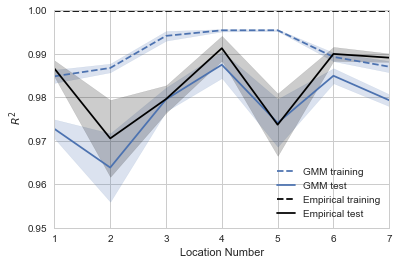

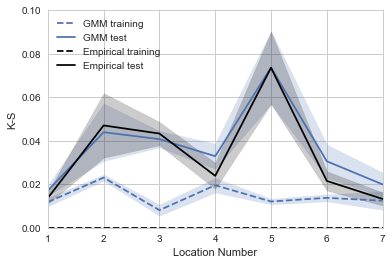

In [5]:
for gof_stat, gof_name in zip(['r_square', 'k_s'],["$\ R^2$", "K-S"]):
    for idx, (model_gof, model_name) in enumerate(zip([gmm_gof, kde_gof], ['GMM', 'Empirical'])):
        for column, linestyle in zip(['training', 'test'], ['--', '-']):
            color = prop_cycle[idx] if model_name != 'Empirical' else 'black'
            plot(location_range, model_gof[gof_stat][column], 
                 linestyle, label=model_name+' '+column, color=color)
            plt.fill_between(location_range, 
                             model_gof[gof_stat][column] - model_gof[gof_stat][column+'_std'],
                             model_gof[gof_stat][column] + model_gof[gof_stat][column+'_std'],
                             alpha=0.2, color=color)

    plt_configure(xlabel='Location Number', ylabel=gof_name, legend={'loc':'best'}, figsize=(6,4))
    if gof_stat == 'r_square':
        ybottom = min(plt.gca().get_ylim()[0],0.95)
        plt.gca().set_ylim(top=1, bottom=ybottom)
    if gof_stat == 'k_s':
        ytop = max(plt.gca().get_ylim()[1],0.1)
        plt.gca().set_ylim(top=ytop, bottom=0)
    plt.show()

### Rsquare '

In [6]:
gmm_gof, kde_gof, al_gof ={}, {}, {}
gmm_gof['r_square'] = pd.DataFrame([
    [0.892503,0.957736,0.951329,0.894308,0.974048,0.937801,0.916493],
    [0.874509,0.929547,0.936945,0.896713,0.954522,0.937642,0.885931],
    [0.002191,0.003074,0.002149,0.002304,0.000701,0.002554,0.00318],
    [0.00523,0.007603,0.004258,0.004494,0.005162,0.001813,0.004421]], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

kde_gof['r_square'] = pd.DataFrame([
    [0.999,0.999,0.999,0.999,0.999,0.999,0.999],
    [0.916261,0.960259,0.941848,0.918686,0.967926,0.956306,0.945905],
    [0,0,0,0,0,0,0],
    [0.004343,0.009222,0.003387,0.004971,0.003752,0.00338,0.003018]], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

al_gof['r_square'] = pd.DataFrame([
    [0.842838,0.679497,0.788293,0.870077,0.909843,0.867707,0.791955],
    [0.840498,0.668258,0.765633,0.870125,0.883627,0.869238,0.78555],
    [0.003846,0.007116,0.001512,0.007401,0.004053,0.003855,0.001707],
    [0.00234,0.00626,0.004033,0.003346,0.008161,0.004746,0.003771]], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

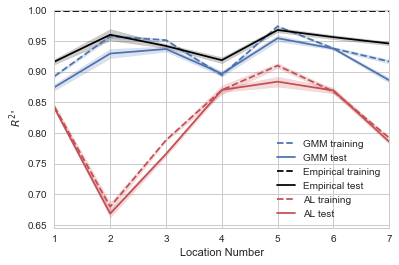

In [7]:
for gof_stat, gof_name in zip(['r_square'],["$\ R^2$'"]):
    for idx, (model_gof, model_name) in enumerate(zip([gmm_gof, kde_gof, al_gof], ['GMM', 'Empirical', 'AL'])):
        for column, linestyle in zip(['training', 'test'], ['--', '-' ]):
            color = prop_cycle[idx] if model_name != 'Empirical' else 'black'
            plot(location_range, model_gof[gof_stat][column], 
                 linestyle, label=model_name+' '+column, color=color)
            plt.fill_between(location_range, 
                             model_gof[gof_stat][column] - model_gof[gof_stat][column+'_std'],
                             model_gof[gof_stat][column] + model_gof[gof_stat][column+'_std'],
                             alpha=0.2, color=color)

    plt_configure(xlabel='Location Number', ylabel=gof_name, legend={'loc':'best'}, figsize=(6,4))
    if gof_stat == 'r_square':
        plt.gca().set_ylim(top=1)
    if gof_stat == 'k_s':
        plt.gca().set_ylim(bottom=0)
    plt.show()

## Univar

In [8]:
gmm_gof, kde_gof, al_gof, weibull_gof ={}, {}, {}, {}
gmm_gof['r_square'] = pd.DataFrame([
[0.96752,0.954688,0.993686,0.972757,0.989926,0.990865,0.973355],
[0.973693,0.923536,0.98344,0.976385,0.983828,0.988593,0.973176],
[0.00112,0.00275,0.000323,0.001059,0.000806,0.001063,0.002086],
[0.001755,0.01568,0.003813,0.003234,0.004072,0.001651,0.003552],
], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

gmm_gof['k_s'] = pd.DataFrame([
[0.026149,0.029437,0.020963,0.045117,0.032775,0.02949,0.025464],
[0.021758,0.040974,0.032459,0.04126,0.033156,0.035314,0.029118],
[0.000204,0.00023,0.001815,0.001237,0.001681,0.002173,0.001432],
[0.0016,0.013402,0.006204,0.005933,0.009065,0.003887,0.003581],
], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()


weibull_gof['k_s'] = pd.DataFrame([
# [0.030432,0.056555,0.094917,0.046053,0.245186,0.059997,0.046747],
# [0.026844,0.078473,0.056746,0.044881,0.214916,0.075369,0.050342],
# [0.000941,0.004661,0.003469,0.001515,0.005788,0.005191,0.001897],
# [0.000884,0.019707,0.007836,0.001695,0.00204,0.004807,0.001449],
    [0.027617,0.054715,0.021808,0.042217,0.022126,0.026808,0.04977],
    [0.022919,0.072672,0.060531,0.038035,0.051939,0.025777,0.053423],
    [0.00074,0.002681,0.004069,0.004809,0.002537,0.003145,0.001969],
    [0.001199,0.019707,0.008044,0.002239,0.003116,0.001665,0.001449],
], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

weibull_gof['r_square'] = pd.DataFrame([
# [0.966192,0.779786,0.991484,0.955314,0.989967,0.984146,0.898507],
# [0.973987,0.766603,0.972906,0.96072,0.985592,0.976619,0.904187],
# [0.000727,0.010897,0.001293,0.00339,0.001035,0.001423,0.003364],
# [0.001594,0.049308,0.006168,0.002141,0.002189,0.002182,0.002745],
    [0.963842,0.774565,0.98301,0.951127,0.980436,0.976451,0.897719],
    [0.972033,0.764696,0.957302,0.9566,0.96822,0.971487,0.903404],
    [0.000777,0.011096,0.002526,0.003636,0.000783,0.000856,0.003371],
    [0.001648,0.048048,0.007989,0.002231,0.002163,0.00306,0.002743],
], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

al_gof['k_s'] = pd.DataFrame([
[0.011976,0.025844,0.010861,0.010986,0.015603,0.011473,0.022811],
[0.013425,0.044118,0.04834,0.008694,0.031844,0.018938,0.021996],
[0.000941,0.002266,0.001894,0.003959,0.00561,0.003447,0.001261],
[0.002534,0.01694,0.008539,0.002693,0.003025,0.003578,0.000905],
], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

al_gof['r_square'] = pd.DataFrame([
[0.987736,0.867602,0.990731,0.99448,0.993541,0.992584,0.954805],
[0.989015,0.839735,0.976501,0.996491,0.990224,0.988089,0.959541],
[0.000621,0.00905,0.000901,0.000629,0.002034,0.000863,0.002292],
[0.000928,0.039379,0.005484,0.000592,0.000978,0.001168,0.002838],
], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()


kde_gof['k_s'] = pd.DataFrame([
[0,0,0,0,0,0,0],
[0.011123,0.046653,0.044872,0.009492,0.037915,0.019225,0.009697],
[0,0,0,0,0,0,0],
[0.002983,0.020651,0.007903,0.002629,0.009866,0.007845,0.003178]
], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

kde_gof['r_square'] = pd.DataFrame([
[0.999,0.999,0.999,0.999,0.999,0.999,0.999],
[0.994172,0.95521,0.979663,0.996345,0.989829,0.98878,0.997402],
[0,0,0,0,0,0,0],
[0.000519,0.022714,0.00483,0.000382,0.004814,0.003548,0.001156],
], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

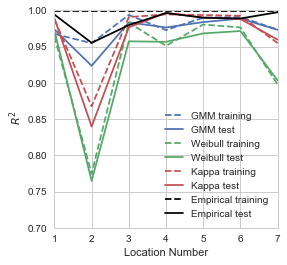

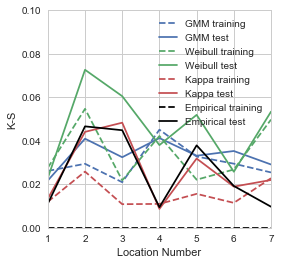

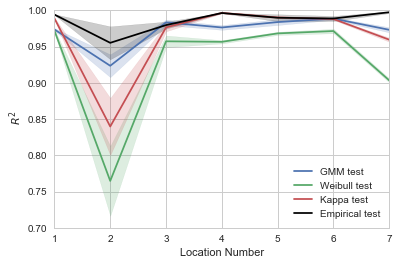

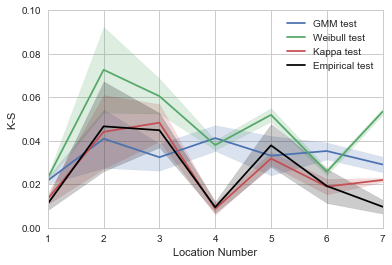

In [9]:
for gof_stat, gof_name in zip(['r_square', 'k_s'],["$\ R^2$", "K-S"]):
    for idx, (model_gof, model_name) in enumerate(zip([gmm_gof, weibull_gof, al_gof, kde_gof], ['GMM',  'Weibull', 'Kappa', 'Empirical'])):
        for column, linestyle in zip(['training', 'test'], ['--', '-']):
            color = prop_cycle[idx] if model_name != 'Empirical' else 'black'
            plot(location_range, model_gof[gof_stat][column], 
                 linestyle, label=model_name+' '+column, color=color)

    plt_configure(xlabel='Location Number', ylabel=gof_name, legend={'loc':'best'}, figsize=(4, 4))
    if gof_stat == 'r_square':
        plt.gca().set_ylim(top=1, bottom=0.7)
    if gof_stat == 'k_s':
        plt.gca().set_ylim(top=0.1, bottom=0)
    plt.show()  
    

for gof_stat, gof_name in zip(['r_square', 'k_s'],["$\ R^2$", "K-S"]):
    for idx, (model_gof, model_name) in enumerate(zip([gmm_gof, weibull_gof, al_gof, kde_gof], ['GMM',  'Weibull', 'Kappa', 'Empirical'])):
        for column, linestyle in zip(['test'], ['-']):
            color = prop_cycle[idx] if model_name != 'Empirical' else 'black'
            plot(location_range, model_gof[gof_stat][column], 
                 linestyle, label=model_name+' '+column, color=color)
            plt.fill_between(location_range, 
                             model_gof[gof_stat][column] - model_gof[gof_stat][column+'_std'],
                             model_gof[gof_stat][column] + model_gof[gof_stat][column+'_std'],
                             alpha=0.2, color=color)

    plt_configure(xlabel='Location Number', ylabel=gof_name, legend={'loc':'best'}, figsize=(6,4))
    if gof_stat == 'r_square': plt.gca().set_ylim(top=1, bottom=0.7)
    if gof_stat == 'k_s': plt.gca().set_ylim(top=0.1, bottom=0)
    plt.show()  

In [10]:
gmm_gof['r_square_dir'] = pd.DataFrame([
[0.979331,0.996548,0.998464,0.954626,0.996795,0.991585,0.962213],
[0.943759,0.981063,0.990947,0.894337,0.966793,0.985598,0.94146],
[0.002163,0.000491,0.000363,0.007831,0.000607,0.001517,0.007238],
[0.012038,0.005741,0.002065,0.011087,0.010758,0.004396,0.009785],
], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

al_gof['r_square_dir'] = pd.DataFrame([
[0.978166,0.998951,0.997405,0.958834,0.995723,0.995084,0.977407],
[0.965509,0.992327,0.99388,0.922057,0.986293,0.988398,0.958579],
[0.004136,0.000312,0.001648,0.011955,0.00288,0.001273,0.007808],
[0.005896,0.002696,0.001716,0.020078,0.001777,0.004739,0.002668]
], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

kde_gof['r_square_dir'] = pd.DataFrame([
[0.999,0.999,0.999,0.999,0.999,0.999,0.999],
[0.941231,0.989727,0.990873,0.881105,0.975176,0.987371,0.950167],
[0,0,0,0,0,0,0],
[0.010244,0.004347,0.002074,0.010746,0.009136,0.005987,0.012927],
], 
     index = ['training', 'test', 'training_std', 'test_std']).transpose()

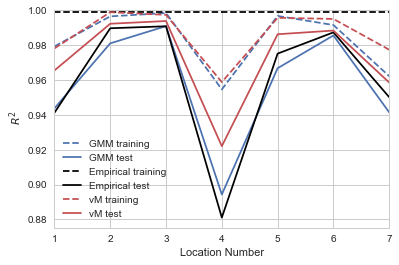

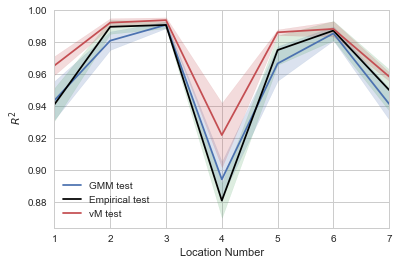

In [11]:
for gof_stat, gof_name in zip(['r_square_dir'],["$\ R^2$"]):
    for idx, (model_gof, model_name) in enumerate(zip([gmm_gof, kde_gof, al_gof], ['GMM', 'Empirical', 'vM'])):
        for column, linestyle in zip(['training', 'test'], ['--', '-']):
            color = prop_cycle[idx] if model_name != 'Empirical' else 'black'
            plot(location_range, model_gof[gof_stat][column], 
                 linestyle, label=model_name+' '+column, color=color)
    plt_configure(xlabel='Location Number', ylabel=gof_name, legend={'loc':'best'}, figsize=(6,4))
    if gof_stat == 'r_square_dir':
        plt.gca().set_ylim(top=1)
    plt.show()
    
for gof_stat, gof_name in zip(['r_square_dir'],["$\ R^2$"]):
    for idx, (model_gof, model_name) in enumerate(zip([gmm_gof, kde_gof, al_gof], ['GMM', 'Empirical', 'vM'])):
        for column, linestyle in zip(['test'], ['-']):
            color = prop_cycle[idx] if model_name != 'Empirical' else 'black'
            plot(location_range, model_gof[gof_stat][column], 
                 linestyle, label=model_name+' '+column, color=color)
            plt.fill_between(location_range, 
                             model_gof[gof_stat][column] - model_gof[gof_stat][column+'_std'],
                             model_gof[gof_stat][column] + model_gof[gof_stat][column+'_std'],
                             alpha=0.2, color=prop_cycle[idx])

    plt_configure(xlabel='Location Number', ylabel=gof_name, legend={'loc':'best'}, figsize=(6,4))
    if gof_stat == 'r_square_dir':
        plt.gca().set_ylim(top=1)        
    plt.show()

## R square'

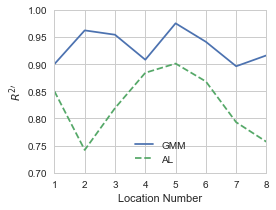

In [20]:
# Plot result
x=arange(1,9)
# gmm_rsquare = [0.90,0.962,0.954,0.908,0.975,0.941,0.905,0.916,]
# al_rsquare=[0.85,0.742,0.819,0.884,0.901,0.868,0.793,0.727]
gmm_rsquare = [0.90,0.962,0.954,0.908,0.975,0.941,0.896,0.916,]
al_rsquare=[0.85,0.742,0.819,0.884,0.901,0.868,0.793,0.757]
plot(x, gmm_rsquare, label='GMM')
plot(x, al_rsquare, '--', label='AL')
plt.axis([1,8,0.7,1])
plt_configure(xlabel='Location Number', ylabel="${R^2}'$", legend=True, figsize=figsize)

### Sectoral Comparison

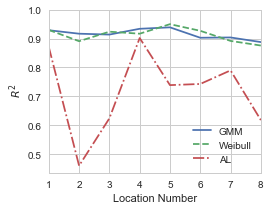

In [13]:
# gmm_rsquare = [0.929,0.917,0.914,0.932,0.939,0.903,0.915,0.893]
# al_rsquare = [0.871,0.460,0.624,0.902,0.738,0.742,0.789,0.606,]
# weibull_rsquare = [0.939,0.919,0.982,0.923,0.953,0.940,0.895,0.885,]
gmm_rsquare = [0.929,0.917,0.914,0.934,0.939,0.903,0.904,0.888]
al_rsquare = [0.871,0.460,0.624,0.902,0.739,0.743,0.790,0.618]
weibull_rsquare = [0.930,0.891,0.924,0.917,0.950,0.927,0.892,0.876]
x = arange(1, len(gmm_rsquare)+1)

plot(x, gmm_rsquare, label='GMM')
plot(x, weibull_rsquare , '--', label='Weibull')
plot(x, al_rsquare, '-.', label='AL')
ylim = min(plt.gca().get_ylim()[0], .7)
plt.axis([1,8,ylim,1])
plt_configure(xlabel='Location Number', ylabel="$\ R^2$", legend=True,  figsize=figsize)

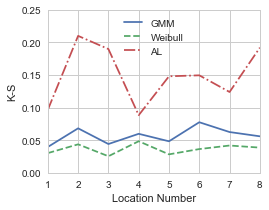

In [14]:
# gmm_ks =[0.039,0.068,0.044,0.058,0.048,0.077,0.054,0.054,]
# weibull_ks=[0.05,0.338,0.148,0.055,0.105,0.164,0.062,0.094,]
# al_ks=[0.096,0.209,0.189,0.088,0.148,0.149,0.123,0.183,]

gmm_ks =[0.039601966245129336,0.06817795413884369, 0.044120717099507316,0.05977094141580642, 0.04829620076818744, 0.0775136563662676, 0.06247174741959163, 0.055940124604485504,]
weibull_ks=[0.03020232396164082, 0.04364224700028274, 0.025391303946992554,0.04838766884302849, 0.02829538458023572, 0.0363669122587272,  0.04182090374913388, 0.038604610233302396,]
al_ks=[0.0965960255229764,0.20990892620926532,0.18972716778738918,0.08830524619896017,0.1479504872261401,0.1494225896653186,0.1238618764610257,0.19186178154793507,]

plot(x, gmm_ks, label='GMM')
plot(x, weibull_ks , '--', label='Weibull')
plot(x, al_ks, '-.', label='AL')
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.axis([1,8,0,ylim])
plt_configure(xlabel='Location Number', ylabel="K-S", legend=True, figsize=figsize)

## Univar Result Summary

### Speed

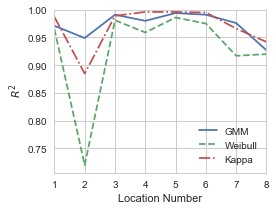

In [15]:
# gmm_rsquare = [0.970,0.948,0.990,0.978,0.993,0.991,0.976,0.926,]
# weibull_rsquare = [0.965,0.718,0.990,0.960,0.993,0.978,0.919,0.922,]
# kappa_rsquare = [0.987,0.884,0.989,0.996,0.996,0.995,0.965,0.942,]

gmm_rsquare = [0.971,0.949,0.991,0.980,0.994,0.991,0.976,0.927]
weibull_rsquare = [0.965,0.720,0.981,0.959,0.986,0.975,0.917,0.920]
kappa_rsquare = [0.987,0.885,0.989,0.996,0.996,0.995,0.966,0.942]

x = arange(1, len(gmm_rsquare)+1)

plot(x, gmm_rsquare, label='GMM')
plot(x, weibull_rsquare , '--', label='Weibull')
plot(x, kappa_rsquare, '-.', label='Kappa')

ylim = min(plt.gca().get_ylim()[0], .75)
plt.axis([1,8,ylim,1])
plt_configure(xlabel='Location Number', ylabel="$\ R^2$", legend=True, figsize=figsize)

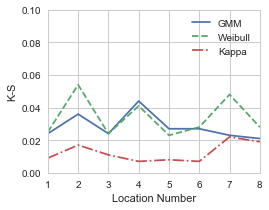

In [16]:
# gmm_ks =[0.024,0.035,0.024,0.045,0.026,0.026,0.025,0.020]
# weibull_ks=[0.027,0.061,0.122,0.036,0.195,0.052,0.045,0.034]
# kappa_ks=[0.008,0.016,0.010,0.006,0.007,0.006,0.021,0.018]

gmm_ks =[0.024,0.036,0.024,0.044,0.027,0.027,0.023,0.021]
weibull_ks=[0.025,0.054,0.024,0.041,0.023,0.028,0.048,0.028]
kappa_ks=[0.009,0.017,0.011,0.007,0.008,0.007,0.022,0.019]

x = arange(1, len(gmm_ks)+1)

plot(x, gmm_ks, label='GMM', )
plot(x, weibull_ks , '--', label='Weibull')
plot(x, kappa_ks, '-.', label='Kappa')

ylim = max(plt.gca().get_ylim()[1],0.1)
plt.axis([1,8,0,ylim])
plt_configure(xlabel='Location Number', ylabel="K-S", legend=True, figsize=figsize)

### Direction

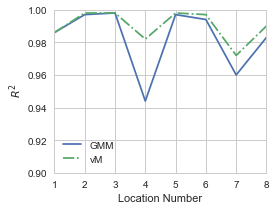

In [17]:
gmm_rsquare = [0.986,0.997,0.998,0.944,0.997,0.994,0.960,0.983]
vonmises_rsquare = [0.986,0.998,0.998,0.982,0.998,0.997,0.972,0.990]
x = arange(1, len(gmm_rsquare)+1)

plot(x, gmm_rsquare, label='GMM')
plot(x, vonmises_rsquare, '-.', label='vM')
ylim = min(plt.gca().get_ylim()[0], .9)
plt.axis([1,8,ylim,1])
plt_configure(xlabel='Location Number', ylabel="$\ R^2$",  legend=True,  figsize=figsize)

In [18]:
sss

NameError: name 'sss' is not defined

## Nonstationary Analysis

In [ ]:
# Remember to set 
# df = df_all_years['1996':'2005']
# at the beginning

In [ ]:
year_length = 10
year_range = arange(1985, 1997)
x = arange(0, df['speed'].max()+BIN_WIDTH, BIN_WIDTH)
prop_cycle=mpl.rcParams['axes.color_cycle']

def generate_gof_results(gof_set, year_range):
    gof_set = pd.DataFrame(gof_set, index=year_range)
    gof_set_mean = gof_set[-5:].mean().to_dict()
    gof_set_std = gof_set[-5:].std().to_dict()
    return gof_set, gof_set_mean, gof_set_std

def temp_plot(train_gof_set, test_gof_set, test_gof_set_mean, test_gof_set_std):
    for column, column_name in zip(['r_square','k_s','r_square_dir'],["$\ R^2$", "K-S", "$\ R^2 dir$"]):
        plot(year_range, train_gof_set[column], '--', label = 'training', color=prop_cycle[0])
        plot(year_range, test_gof_set[column], '-', label = 'test', color=prop_cycle[0])
        plt.axhline(test_gof_set_mean[column], linestyle='-', color=prop_cycle[0])
        plt.axhline(test_gof_set_mean[column]+test_gof_set_std[column], linestyle='-', color=prop_cycle[0])
        plt.axhline(test_gof_set_mean[column]-test_gof_set_std[column], linestyle='-', color=prop_cycle[0])
        plt_configure(ylabel=column_name, figsize=(3,2), legend={'loc':'best'})
        plt.show()

### Univar

In [ ]:
%%time
# Univar
# 1. Fit Weibull
train_gof_set, test_gof_set =[], []

for start_year in year_range:
    # 1. Fit Current Dataset, 1991-2000
    current_df = df_all_years[str(start_year):str(start_year+year_length-1)]
    weibull_params, y_weibull, density_expected_weibull, y_cdf_weibull = fit_weibull(df.speed, x)
    train_gof_set.append(weibull_univar_gof(current_df,weibull_params, x, config['bin_width']))
    # 2. Validated on later dataset, 2001-2010
    new_df = df_all_years[str(start_year+year_length):str(start_year+2*year_length-1)]
    test_gof_set.append(weibull_univar_gof(new_df,weibull_params, x, config['bin_width']))
    
train_gof_set, train_gof_set_mean, train_gof_set_std = generate_gof_results(train_gof_set, year_range)
test_gof_set, test_gof_set_mean, test_gof_set_std = generate_gof_results(test_gof_set, year_range)
display(pd.DataFrame([train_gof_set_mean, test_gof_set_mean,
                      train_gof_set_std, test_gof_set_std]))

# 2. GMM
train_gof_set, test_gof_set =[], []

results = Parallel(n_jobs=-1)(delayed(gmm_cv_time)(df_all_years, start_year, 10, x, config, NUMBER_OF_GAUSSIAN) 
                                for start_year in year_range)  

train_gof_set, test_gof_set = map(list, zip(*results))
train_gof_set, train_gof_set_mean, train_gof_set_std = generate_gof_results(train_gof_set, year_range)
test_gof_set, test_gof_set_mean, test_gof_set_std = generate_gof_results(test_gof_set, year_range)
display(pd.DataFrame([train_gof_set_mean, test_gof_set_mean,
                      train_gof_set_std, test_gof_set_std]))


## 3. AL
train_gof_set, test_gof_set =[], []

for start_year in year_range:
    # 1. Fit Current Dataset, 1991-2000
    current_df = df_all_years[str(start_year):str(start_year+year_length-1)]
    kap_params, dir_params, connection_params, phi_data = fit_al(df.speed, df.dir)
    train_gof_set.append(al_univar_gof(current_df, kap_params, dir_params, x, config['bin_width']))
    # 2. Validated on later dataset, 2001-2010
    new_df = df_all_years[str(start_year+year_length):str(start_year+2*year_length-1)]
    test_gof_set.append(al_univar_gof(new_df, kap_params, dir_params, x, config['bin_width']))
    
train_gof_set, train_gof_set_mean, train_gof_set_std = generate_gof_results(train_gof_set, year_range)
test_gof_set, test_gof_set_mean, test_gof_set_std = generate_gof_results(test_gof_set, year_range)
display(pd.DataFrame([train_gof_set_mean, test_gof_set_mean,
                      train_gof_set_std, test_gof_set_std]))

## 4. KDE

train_gof_set, test_gof_set =[], []

for start_year in year_range:
    # 1. Fit Current Dataset, 1991-2000
    current_df = df_all_years[str(start_year):str(start_year+year_length-1)]
    train_gof_set.append(kde_univar_gof(current_df, current_df, x))
    # 2. Validated on later dataset, 2001-2010
    new_df = df_all_years[str(start_year+year_length):str(start_year+2*year_length-1)]
    test_gof_set.append(kde_univar_gof(new_df, current_df, x))
    
train_gof_set, train_gof_set_mean, train_gof_set_std = generate_gof_results(train_gof_set, year_range)
test_gof_set, test_gof_set_mean, test_gof_set_std = generate_gof_results(test_gof_set, year_range)
display(pd.DataFrame([train_gof_set_mean, test_gof_set_mean,
                      train_gof_set_std, test_gof_set_std]))

## Bivar

In [ ]:
# Bivar
# Fit Gmm
train_gof_set, test_gof_set =[], []
for start_year in year_range:
    # 1. Fit Current Dataset, 1991-2000
    current_df = df_all_years[str(start_year):str(start_year+year_length-1)]
    result = fit_gmm(current_df, config=config, number_of_gaussian=NUMBER_OF_GAUSSIAN)
    train_gof_set.append(goodness_of_fit_summary(result['gmm_pdf_result'],  result['kde_result'], config['bin_width']))
    # 2. Validated on later dataset, 2001-2010
    new_df = df_all_years[str(start_year+year_length):str(start_year+2*year_length-1)]
    test_gof_set.append(gmm_gofs_in_previous(new_df, result['gmm_pdf_result'], config))

train_gof_set, train_gof_set_mean, train_gof_set_std = generate_gof_results(train_gof_set, year_range)
test_gof_set, test_gof_set_mean, test_gof_set_std = generate_gof_results(test_gof_set, year_range)
display(pd.DataFrame([train_gof_set_mean, test_gof_set_mean,
                      train_gof_set_std, test_gof_set_std]))

# Fit KDE
train_gof_set, test_gof_set =[], []
for start_year in year_range:
    # 1. Fit Current Dataset, 1991-2000
    current_df = df_all_years[str(start_year):str(start_year+year_length-1)]
    kde_result_standard, _ = fit_kde(current_df, config)   
    train_gof_set.append(kde_gofs(current_df,  kde_result_standard, config))
    # 2. Validated on later dataset, 2001-2010
    new_df = df_all_years[str(start_year+year_length):str(start_year+2*year_length-1)]
    test_gof_set.append(kde_gofs(new_df,  kde_result_standard, config))
    
train_gof_set, train_gof_set_mean, train_gof_set_std = generate_gof_results(train_gof_set, year_range)
test_gof_set, test_gof_set_mean, test_gof_set_std = generate_gof_results(test_gof_set, year_range)
display(pd.DataFrame([train_gof_set_mean, test_gof_set_mean,
                      train_gof_set_std, test_gof_set_std]))

## Bivar R square'

In [ ]:
# 1. Fit GMM
# 2. Train GMM GOF
# 3. Test GMM GOF

train_gof_set, test_gof_set =[], []
# GMM
for start_year in year_range:
    current_df = df_all_years[str(start_year):str(start_year+year_length-1)]
    result = fit_gmm(current_df, config=config, number_of_gaussian=NUMBER_OF_GAUSSIAN)
    density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(result['gmm'], current_df, angle, incre, bin_width=BIN_WIDTH) 
                                            for angle in arange(0, 360, incre)) 
    train_gof_set.append({'r_square': true_R_square(density_collection, len(df))[-1]})

    new_df = df_all_years[str(start_year+year_length):str(start_year+2*year_length-1)]
    density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(result['gmm'], new_df, angle, incre, bin_width=BIN_WIDTH) 
                                            for angle in arange(0, 360, incre)) 
    test_gof_set.append({'r_square': true_R_square(density_collection, len(df))[-1]})
        
train_gof_set, train_gof_set_mean, train_gof_set_std = generate_gof_results(train_gof_set, year_range)
test_gof_set, test_gof_set_mean, test_gof_set_std = generate_gof_results(test_gof_set, year_range)
display(pd.DataFrame([train_gof_set_mean, test_gof_set_mean,
                      train_gof_set_std, test_gof_set_std]))


train_gof_set, test_gof_set =[], []
# Empirical
for start_year in year_range:
    current_df = df_all_years[str(start_year):str(start_year+year_length-1)]
    density_collection=Parallel(n_jobs=-1)(delayed(emp_direction_compare)(current_df, current_df, angle, incre) 
                                                for angle in arange(0, 360, incre))  
    train_gof_set.append({'r_square': true_R_square(density_collection, len(df))[-1]})

    new_df = df_all_years[str(start_year+year_length):str(start_year+2*year_length-1)]
    density_collection=Parallel(n_jobs=-1)(delayed(emp_direction_compare)(current_df, new_df, angle, incre) 
                                                for angle in arange(0, 360, incre))  
    test_gof_set.append({'r_square': true_R_square(density_collection, len(df))[-1]})
        
train_gof_set, train_gof_set_mean, train_gof_set_std = generate_gof_results(train_gof_set, year_range)
test_gof_set, test_gof_set_mean, test_gof_set_std = generate_gof_results(test_gof_set, year_range)
display(pd.DataFrame([train_gof_set_mean, test_gof_set_mean,
                      train_gof_set_std, test_gof_set_std]))


train_gof_set, test_gof_set =[], []

# AL
for start_year in year_range:
    current_df = df_all_years[str(start_year):str(start_year+year_length-1)]
    kap_params, dir_params, connection_params, phi_data = fit_al(df.speed, df.dir)
    al_params = [kap_params, dir_params, connection_params]
    density_collection=Parallel(n_jobs=-1)(delayed(al_direction_compare)(al_params, current_df, angle, incre, bin_width=BIN_WIDTH) 
                                            for angle in arange(0, 360, incre))  
    train_gof_set.append({'r_square': true_R_square(density_collection, len(df))[-1]})

    new_df = df_all_years[str(start_year+year_length):str(start_year+2*year_length-1)]
    density_collection=Parallel(n_jobs=-1)(delayed(al_direction_compare)(al_params, new_df, angle, incre, bin_width=BIN_WIDTH) 
                                            for angle in arange(0, 360, incre))  
    test_gof_set.append({'r_square': true_R_square(density_collection, len(df))[-1]})
        
train_gof_set, train_gof_set_mean, train_gof_set_std = generate_gof_results(train_gof_set, year_range)
test_gof_set, test_gof_set_mean, test_gof_set_std = generate_gof_results(test_gof_set, year_range)
display(pd.DataFrame([train_gof_set_mean, test_gof_set_mean,
                      train_gof_set_std, test_gof_set_std]))

In [ ]:
sss

In [ ]:
# Univar Empirical LImit
# %%time
# if df_all_years.index.year[0] <= 2000:
#     # GMM test against previous data
#     fig1, ax1 = plt.subplots(figsize=(3,2.5))
#     fig2, ax2 = plt.subplots(figsize=(3,2.5))
#     gofs_mean_set_bivar_previous = []
#     prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
#     for year_length in [10]:
#         color = next(prop_cycle)
#         start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
#         gofs_bivar_previous=Parallel(n_jobs=-1)(delayed(gmm_gofs_in_previous)(df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)], gmm_pdf_result, config) 
#            for sub_start_year in arange(start_year, end_year+1)) 
#         gofs_bivar_previous=pd.DataFrame(gofs_bivar_previous, index=arange(start_year, end_year+1))    
#         gofs_bivar_set[year_length].plot(y='R_square',ax=ax1, style='--', color=color, label='Empirical')
#         gofs_bivar_set[year_length].plot(y='K_S',ax=ax2, style='--', color=color, label='Empirical')
#         gofs_bivar_previous.plot(y='R_square', color=color, ax=ax1, label='GMM on previous')
#         gofs_bivar_previous.plot(y='K_S', color=color, ax=ax2, label='GMM on previous')
#         year_lim = end_year-year_length-5, end_year-year_length
#         gofs_mean = gofs_bivar_previous.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
#         gofs_mean['year_lim']=year_lim
#         gofs_mean_set_bivar_previous.append(gofs_mean)

#     print('10 year comparison')
#     plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
#     plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
#     align_figures()
#     display(pd.DataFrame(gofs_mean_set_bivar_previous).set_index('year_lim'))

In [ ]:
# Biar Empirical LImit
# %%time
# if df_all_years.index.year[0] <= 2000:    
#     fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
#     fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
#     fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
#     prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
#     gofs_mean_set = []

#     x = arange(0, df['speed'].max()+BIN_WIDTH, BIN_WIDTH)
#     _, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, x, bin_width=BIN_WIDTH)
#     _, _, density_expected_weibull, y_cdf_weibull = fit_weibull(df.speed, x)

#     for year_length in [10]:
#         start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
#         gofs = []
#         for sub_start_year in arange(start_year, end_year+1):
#             df_previous = df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]
#             _, _, density_speed, y_ecdf_previous, density_dir = empirical_marginal_distribution(df_previous, x) 

#             r_square_speed = sector_r_square(density_speed*BIN_WIDTH, density_speed_expected_gmm)
#             r_square_speed_weibull = sector_r_square(density_speed*BIN_WIDTH, density_expected_weibull)

#             k_s_speed = (np.abs(y_ecdf_previous - y_cdf_gmm)).max()
#             k_s_speed_weibull = (np.abs(y_ecdf_previous - y_cdf_weibull)).max()

#             r_square_dir = sector_r_square(density_dir*10, density_dir_expected[:-1])
#             gofs.append({'year': sub_start_year, 
#                          'r_square': r_square_speed, 'k_s': k_s_speed, 'r_square_dir': r_square_dir,
#                           'r_square_weibulll': r_square_speed_weibull, 'k_s_weibulll': k_s_speed_weibull})

#         gofs=pd.DataFrame(gofs).set_index(['year'])  
#         year_lim = end_year-year_length-5, end_year-year_length
#         gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
#         gofs_mean['year_lim']=year_lim
#         gofs_mean_set.append(gofs_mean)

#         color = next(prop_cycle)
#         # GMM agains previous data
#         gofs.plot(y='r_square', ax=ax1, color=color, label='GMM on previous')
#         gofs.plot(y='k_s', ax=ax2, color=color, label='GMM on previous')
#         gofs.plot(y='r_square_dir', ax=ax3, color=color, label='GMM on previous')
#         # Empricial agains previous data
#         ax1.plot(gofs_univar_set[year_length].r_square, color=color, linestyle='--', label='Empirical')
#         ax2.plot(gofs_univar_set[year_length].k_s, color=color, linestyle='--', label='Empirical')
#         ax3.plot(gofs_univar_set[year_length].r_square_dir, color=color, linestyle='--', label='Empirical')
#         color = next(prop_cycle)
#         gofs.plot(y='r_square_weibulll', ax=ax1, label='Weibull', color=color)
#         gofs.plot(y='k_s_weibulll', ax=ax2, label='Weibull', color=color)

#         plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
#         plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
#         plt_configure(ax=ax3, ylabel='$\ R^2$', xlabel='start year', legend=True)

#     align_figures()
#     display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

In [ ]:
# Future comparison, nonstationary
df_future = df_all_years['2006':'2015']
x = arange(0, df['speed'].max()+BIN_WIDTH, BIN_WIDTH)
pd.DataFrame([kde_univar_gof(df_future, df, x),
              gmm_univar_gof(df_future, gmm_params, x, BIN_WIDTH),
              al_univar_gof(df_future, kap_params, dir_params, x, BIN_WIDTH),
              weibull_univar_gof(df_future, weibull_params, x, BIN_WIDTH)])

## Speed Overview

In [ ]:
# Single Plot Speed Distribution
def plot_speed(df_speed, speed_limit, title=None):
    bin_width=1
    bins = np.arange(0, speed_limit + bin_width, bin_width)
    df_speed.hist(bins=bins)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel="Speed"+speed_unit_text, ylabel="Frequency", tight='y', figsize=(2.7,1.2), title=title)
    plt.show()

In [ ]:
init_time = (myround(df.date.min() // 10000, 5)+1) * 10000
speed_limit = df['speed'].quantile(0.999)
for start_time in range(init_time, 20200000, 50000):
    end_time = min(start_time + 50000, df.date.max() + 10000)
    sub_df = df.query('(date >= @start_time) & (date < @end_time)')
    if len(sub_df) > 0:
        title = '%s - %s' % (sub_df.date.min() // 10000, sub_df.date.max() // 10000)
        print(title)
        plot_speed(sub_df.speed, speed_limit=speed_limit, title=title)

In [ ]:
sss

In [ ]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20

%%time
empirical_densities=Parallel(n_jobs=-1)(delayed(empirical_direction)(df, angle, rebinned_angle, bin_width=BIN_WIDTH) 
                                        for angle in arange(0, 360, rebinned_angle))  

gmm_densities=Parallel(n_jobs=-1)(delayed(gmm_direction)(gmm, df, angle, rebinned_angle, bin_width=BIN_WIDTH) 
                                        for angle in arange(0, 360, rebinned_angle))  

temp_collect = [{**empirical_density, **gmm_density} for empirical_density, gmm_density in zip(empirical_densities, gmm_densities)]

In [ ]:
bin_width=BIN_WIDTH
original_incre = 10
start, end = -original_incre/2 + rebinned_angle/2, 360
max_count = max_count_for_angles(df, start, end, rebinned_angle)
max_speed = df.speed.max()
plot_range = [0, max_speed, 0, max_count*1.05]

In [ ]:
for d in temp_collect:
    x = d['x']
    R_square_gmm = sector_r_square(d['density']*bin_width, d['density_expected'])
    print(R_square_gmm)
    
#     5. Make Plots
    fig = plt.figure(figsize=(10,1.9))
    # 5.1. Frequency Comparison
    ax1 = fig.add_subplot(1,3,1)        
    plt.bar(d_['bins'][:-1]+bin_width/2, d_['density']*len(df['dir']), width=bin_width, alpha=0.5, label='Data')
    plot(x, d_['y_gmm']*d_['data_size']*bin_width,'-', color='black', label='GMM')
    plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
    plt.axis(plot_range)

    # 5.2. CDF Comaprison
    ax2 = fig.add_subplot(1,3,2)
    plot(x, d_['y_ecdf'],'o', alpha=0.8, label='Data')
    plot(x, d_['y_cdf_gmm'],'-', color='black',label='GMM')
    plot(x, d_['y_cdf_weibull'],'--', color='black',label='Weibull')
    plt.gca().set_xlim(right = max_speed)
    plt_configure(xlabel = "V", ylabel='P', legend=True)

In [ ]:
ssss

In [ ]:
### Examning Data limit
df = df_all_years['2011':'2015']
# Bivar Diff
for resample_num in [1000, 10000, 100000, 1000000]:
    df_resample = df.sample(n=resample_num, replace=True)
    print(kde_gofs(df_resample,  kde_result, config))

In [ ]:
# Univar Diff
x = arange(0, df.speed.max() + 1)
_, _, density, y_ecdf, density_dir = empirical_marginal_distribution(df, x)
for resample_num in [1000, 10000, 100000, 1000000]:
    df_resample = df.sample(n=resample_num, replace=True)
    print(univar_gof(df_resample, density, y_ecdf, x, density_dir))

In [ ]:
# x = linspace(0, df.speed.max(), 20)
# k_shape, _, lamb_scale = weibull_params = weibull_min.fit(df.speed, loc=0)
# y_weibull = weibull_min.pdf(x, *weibull_params)

# df['speed'].hist(bins=arange(0, df.speed.max()+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data', normed=True)             
# plot(x, y_weibull, '-', color='black',label='Weibull')   
# plt_configure(figsize=(3.7,1.6), xlabel='Speed'+speed_unit_text, ylabel='PDF', legend=True)

## 4.2 Bivariate Empirical Limit

In [ ]:
# gofs_bivar_set, gofs_mean_set_bivar, _, _ = bivar_empirical_limit(df_all_years, config)
# align_figures()
# display(gofs_mean_set_bivar)

## 4.3 Univariate GOF Limit

In [ ]:
# gofs_univar_set, gofs_mean_set, _, _, _ = univar_empirical_limit(df, df_all_years)
# align_figures()
# display(gofs_mean_set)

## 6.5 Insufficient-fit Sector Investigation

### (1) Data Variability, by Bootstrap (Resampling)

In [ ]:
angle =  max_diff_angle = diff_df.ix[diff_df['max_cdf_diff_gmm'].idxmax()]['direction']
incre = rebinned_angle

FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

### (2) Time Variability

In [ ]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(2001, 2015, 5):
    end_time = start_time + 4 
    df_other_years = df_all_years[str(start_time):str(end_time)]
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = start_time)
        
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=start_time, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = start_time*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if start_time == 2011 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if start_time == 2011 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

### (3) Adjacent Sector Variability

In [ ]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('direction == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['datasize'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

# Map

In [ ]:
locations = [[48,-98],[8,-67], [-52,-75],[65, -17],[18,32],[20,120],[-37,142],[36, -2]]
# locations = [[47,-123],[8,-67], [-52,-75],[65, -17],[49,9],[18,32],[24,121],[-37,142]]

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import string

plt.figure(figsize=(9, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# make the map global rather than haveall it zoom in to
# the extents of any plotted data
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.set_xticks([-180, -90, 0, 90, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

for position, num in zip(locations, arange(1,9)):
    print(position)
    plt.plot(position[1], position[0], marker='o', markersize=20, color='white')
    plt.text(position[1], position[0], num, verticalalignment='center', horizontalalignment='center')
    
plt_configure(xlabel='Longtitude (degree)', ylabel='Latitude (degree)')

In [ ]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

# Empirical True R square

In [ ]:
%%time
true_R_square_mean_set=[]
for year_length in [5,10]:
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    df_standard = df_all_years[str(2015-year_length+1):str(2015)]
    true_R_square_set = []
    for sub_start_year in arange(start_year, end_year+1):
        sub_end_year = sub_start_year+year_length-1
        df_previous =  df_all_years[str(sub_start_year):str(sub_end_year)]
        density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(None, df_standard, angle, incre, True, df_previous) 
                                            for angle in arange(0, 360, incre))  
        true_R_square_set.append(true_R_square(density_collection))
    true_R_square_set=pd.DataFrame(true_R_square_set, index=arange(start_year, end_year+1))
    year_lim = end_year-year_length-5, end_year-year_length
    true_R_square_mean = true_R_square_set.query('index >= @year_lim[0] & index <= @year_lim[1]').mean()
    true_R_square_mean['year_lim']=year_lim
    true_R_square_mean_set.append(true_R_square_mean)
    plot(true_R_square_set, label=year_length)
plt_configure(legend=True)
display(pd.DataFrame(true_R_square_mean_set).set_index('year_lim'))